# Обучение без учителя


## Подготовка датасета

In [1]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

Этот набор данных содержит смоделированные данные, представляющие мониторинг в реальном времени различного промышленного оборудования, включая турбины, компрессоры и насосы. Каждая строка в наборе данных соответствует уникальному наблюдению, фиксирующему ключевые параметры, такие как температура, давление, вибрация и влажность. Набор данных также включает информацию о типе оборудования, местоположении и о том, классифицируется ли оборудование как неисправное.

In [134]:
dataset = pd.read_csv('/content/drive/MyDrive/Data_Analysis/equipment_anomaly_data.csv')
dataset.head()

,temperature,pressure,vibration,humidity,equipment,location,faulty
0,58.180180,25.029278,0.606516,45.694907,Turbine,Atlanta,0.0
1,75.740712,22.954018,2.338095,41.867407,Compressor,Chicago,0.0
2,71.358594,27.276830,1.389198,58.954409,Turbine,San Francisco,0.0
3,71.616985,32.242921,1.770690,40.565138,Pump,Atlanta,0.0
4,66.506832,45.197471,0.345398,43.253795,Pump,New York,0.0


In [135]:
print(dataset.columns)

Index(['temperature', 'pressure', 'vibration', 'humidity', 'equipment',
       'location', 'faulty'],
      dtype='object')


In [136]:
# Нормализуем

import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Предположим, что dataset уже загружен из CSV файла
# dataset = pd.read_csv('your_file.csv')

# Разделяем данные на числовые и категориальные
numeric_cols = [
    'temperature', 'pressure', 'vibration', 'humidity', 'faulty'
]

categorical_cols = ['equipment', 'location']

# Нормализация числовых данных
scaler = StandardScaler()
dataset[numeric_cols] = scaler.fit_transform(dataset[numeric_cols])

# Преобразование категориальных данных с помощью one-hot encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

enc_ = OrdinalEncoder()

dataset[['equipment', 'location']] = enc_.fit_transform(dataset[['equipment', 'location']])
dataset.head()

# Теперь dataset содержит нормализованные числовые данные и преобразованные категориальные данные
print(dataset.head())

   temperature  pressure  vibration  humidity  equipment  location    faulty
0    -0.786610 -1.031582  -1.379925 -0.364984        2.0       0.0 -0.333285
1     0.297440 -1.231493   0.996943 -0.688233        0.0       1.0 -0.333285
2     0.026922 -0.815074  -0.305569  0.754840        2.0       4.0 -0.333285
3     0.042873 -0.336688   0.218089 -0.798215        1.0       0.0 -0.333285
4    -0.272588  0.911232  -1.738352 -0.571147        1.0       3.0 -0.333285


In [126]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [137]:
vals = dataset['equipment'].unique()
vals

array([2., 0., 1.])

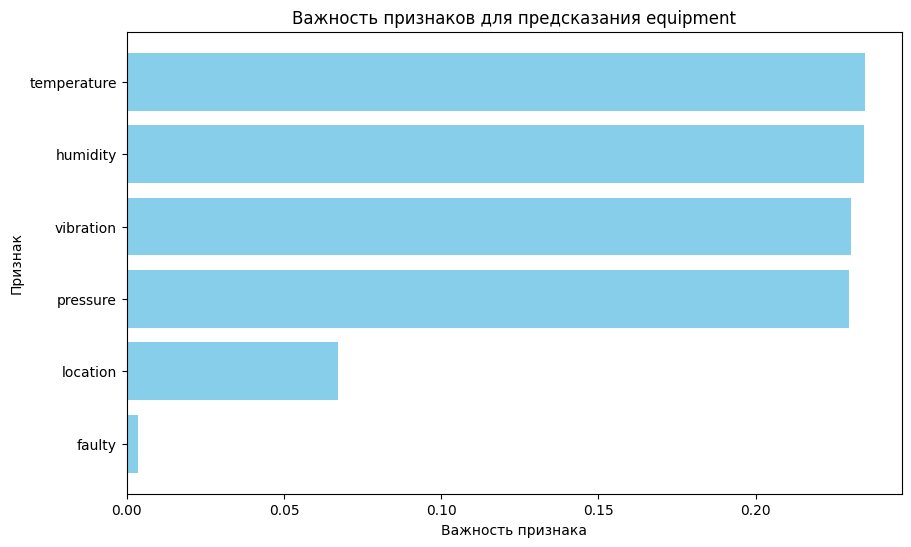

In [138]:
# quality_score - целевая переменая

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Предположим, что dataset уже загружен из CSV файла
# dataset = pd.read_csv('your_file.csv')

# Выбираем целевую переменную и признаки
target = 'equipment'
features = [
    'temperature', 'pressure', 'vibration', 'humidity', 'faulty', 'location'
]

# Разделяем данные на обучающую и тестовую выборки
X = dataset[features]
y = dataset[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем модель случайного леса
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Получаем важность признаков
feature_importances = model.feature_importances_

# Создаем DataFrame для удобства визуализации
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Строим график важности признаков
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков для предсказания equipment')
plt.gca().invert_yaxis()  # Отображаем самые важные признаки сверху
plt.show()

In [139]:
# сохраняем только числовые столбцы. Категориальные кодируем в числовые. Целевую переменную (если она есть) - убираем
cols_for_clusters = [
    'temperature', 'pressure', 'vibration', 'humidity', 'faulty', 'location'
    ]

cols = [
    'temperature', 'pressure', 'vibration', 'humidity', 'faulty', 'location'
    ]

df= dataset[cols_for_clusters].copy() # делаем копию, чтобы не было сюрпризов с исходным набором данных

In [150]:
X = df
genotypes_encoder = OrdinalEncoder()
y = genotypes_encoder.fit_transform(dataset[["equipment"]]).ravel()
yvals = dataset["equipment"]
y

array([2., 0., 2., ..., 1., 0., 2.])

# Понижение размерности (Dimensionality Reduction)

Извлечение признаков
Извлечение признаков (Feature Extraction) это процесс сокращения признаков. В отличие от выбора признаков, который ранжирует существующие атрибуты в соответствии с их значимостью, извлечение признаков фактически преобразует признаки.

**Выбор признаков** — Выбор наиболее релевантных признаков.

**Извлечение признаков** — Объединение признаков в новый, сокращенный набор признаков.

**Проклятие размерности** По мере увеличения количества признаков модель становится сложнее. Чем больше признаков, тем больше вероятность переобучения. Модель машинного обучения, обученная на большом количестве признаков, становится все более зависимой от данных, на которых она была обучена, и в свою очередь переобученна, что приводит к плохой производительности на реальных данных, сводя на нет цель модели.

* **Уменьшает переобучение:** Меньше избыточных данных означает меньше возможностей для принятия решений на основе шума (нерелевантных данных).
* **Улучшает производительность модели:** Меньше вводящих в заблуждение данных означает улучшение производительности нашей модели.
* **Сокращает время обучения:** Меньше данных означает, что алгоритмы обучаются быстрее.
* **Использует немаркированные данные:** Большинство методов извлечения признаков не требуют обучения. Вы можете обучить свой автоэнкодер или подогнать свой PCA на немаркированных данных. Это может быть полезно, если у вас много немаркированных данных, а маркировка занимает много времени и стоит дорого.
* **Лучшая визуализация:** Уменьшение размерности данных до 2D или 3D может позволить нам точно построить и визуализировать их.

##Метод главных компонентов (Principal Component Analysis, PCA)

PCA — это метод на основе проекций, который часто используется для уменьшения размерности больших наборов данных путем преобразования большого набора переменных в меньший, который по-прежнему содержит большую часть информации о большом наборе.



In [141]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

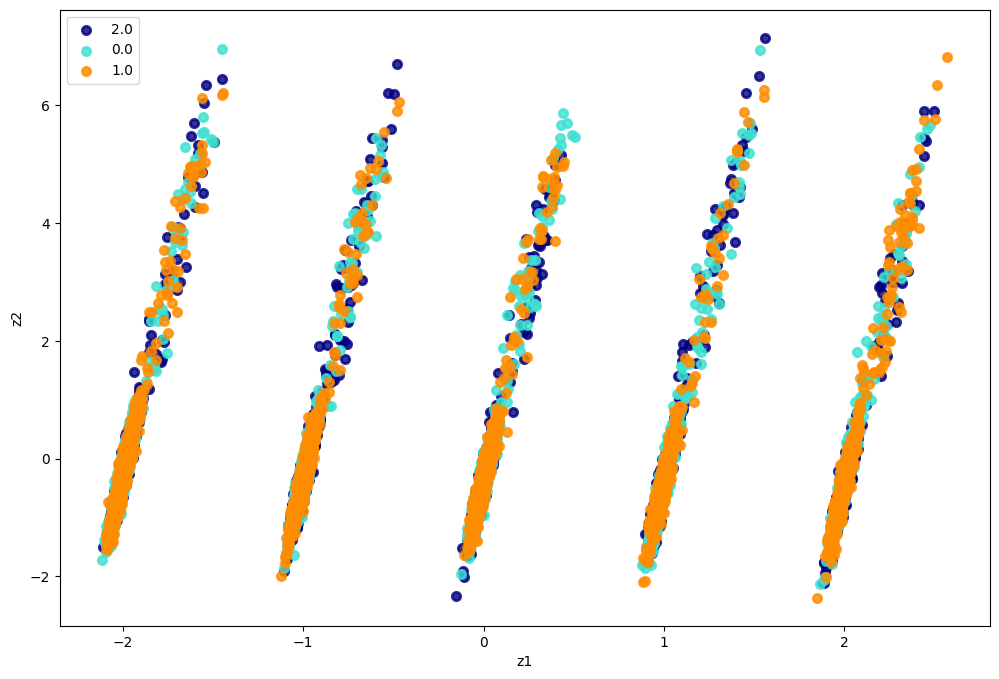

In [151]:
pca = PCA(n_components=2)
X_new = pca.fit(X).transform(X)


plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [152]:
print("Количество строк в датасете:", len(dataset))
print("Количество строк в X:", len(X))
print("Количество строк в y:", len(y))
print("Уникальные значения в y:", set(y))
print("Количество уникальных значений в y:", len(set(y)))

Количество строк в датасете: 7672
Количество строк в X: 7672
Количество строк в y: 7672
Уникальные значения в y: {0.0, 1.0, 2.0}
Количество уникальных значений в y: 3


Цель — показать, как данные распределяются в новом пространстве и как классы разделяются.

Если бы точки разных классов хорошо разделены, это могло бы свидетельствовать о том, что PCA успешно выделил главные компоненты, которые различают классы.

точки перемешаны, это может указывать на то, что классы имеют схожие характеристики и их сложно разделить в двумерном пространстве.

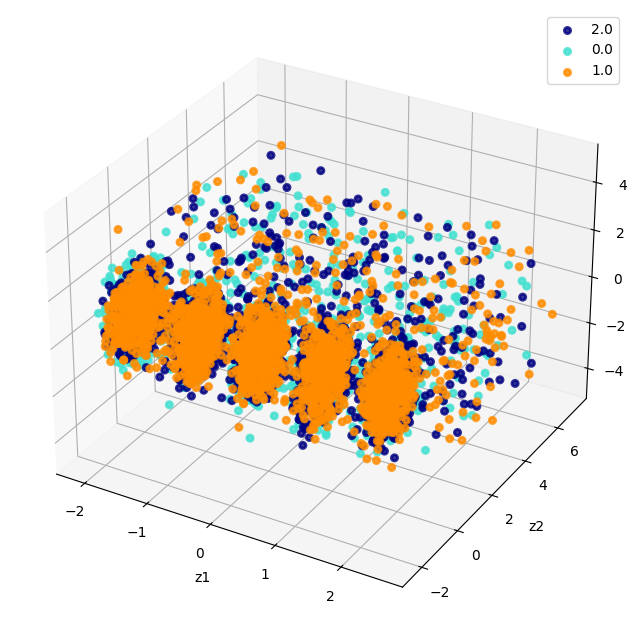

In [153]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Применение PCA с тремя компонентами
pca = PCA(n_components=3)
X_new = pca.fit_transform(X)

# Построение 3D графика
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for color, i, target_name in zip(colors, [0, 1, 2], cols_for_clusters):
    ax.scatter(
        X_new[y == i, 0], X_new[y == i, 1], X_new[y == i, 2],
        color=color, alpha=0.8, lw=lw, label=vals[i]
    )

ax.set_xlabel("z1")
ax.set_ylabel("z2")
ax.set_zlabel("z3")
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.show()

Три признака не помогло хорошо разделить точки

In [154]:
# доля дисперсии (разброса) данных
pca.explained_variance_ratio_

array([0.2849096 , 0.22433382, 0.14438677])

0.29603967, 0.16382738, 0.06807069 - эти данные объясняют долю объяснения дисперсии данных для главной компоненты. Остальная доля - это другик параметры

### Независисый анализ компонентов (Independent Component Analysis, ICA)

ICA — это метод снижения размерности, аналогичный PCA в том смысле, что он берет набор признаков и создает другой набор, который полезен в некотором роде.



In [156]:
from sklearn.decomposition import FastICA

fast_ica = FastICA(n_components=2)
X_new = fast_ica.fit_transform(X)

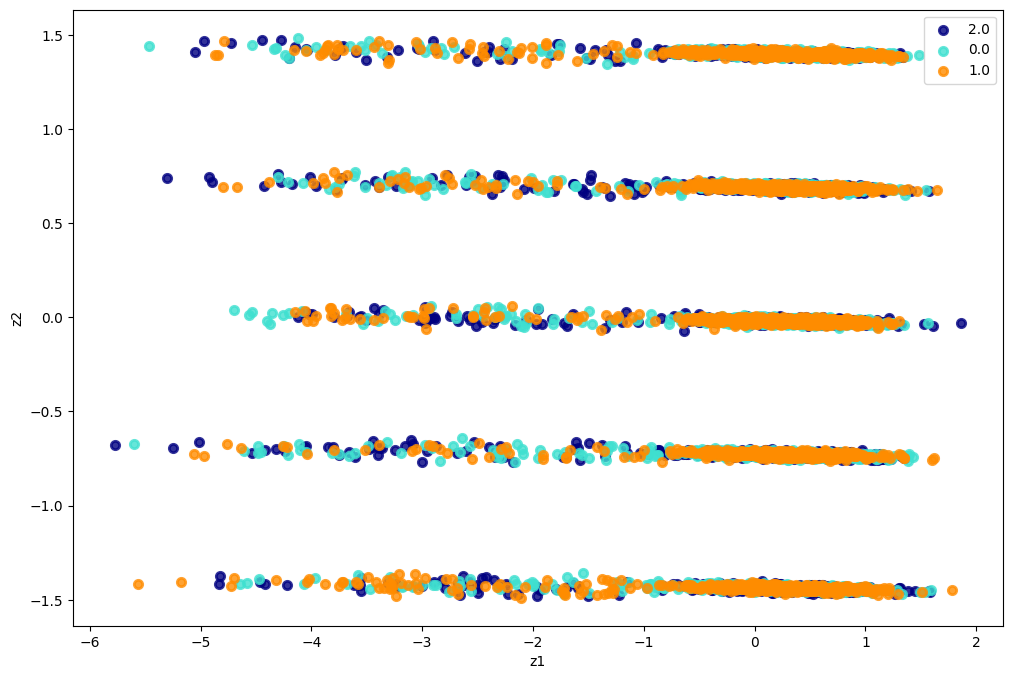

In [157]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

#Нелинейные методы уменьшения размерности

Методы нелинейного преобразования, также известные как методы многообразного обучения, используются, когда данные не лежат в линейном подпространстве. Она основана на гипотезе многообразия, которая гласит, что в многомерной структуре большая часть релевантной информации концентрируется в небольшом числе многообразий низкой размерности.

### Kernel PCA

In [160]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_new = rbf_pca.fit_transform(X)

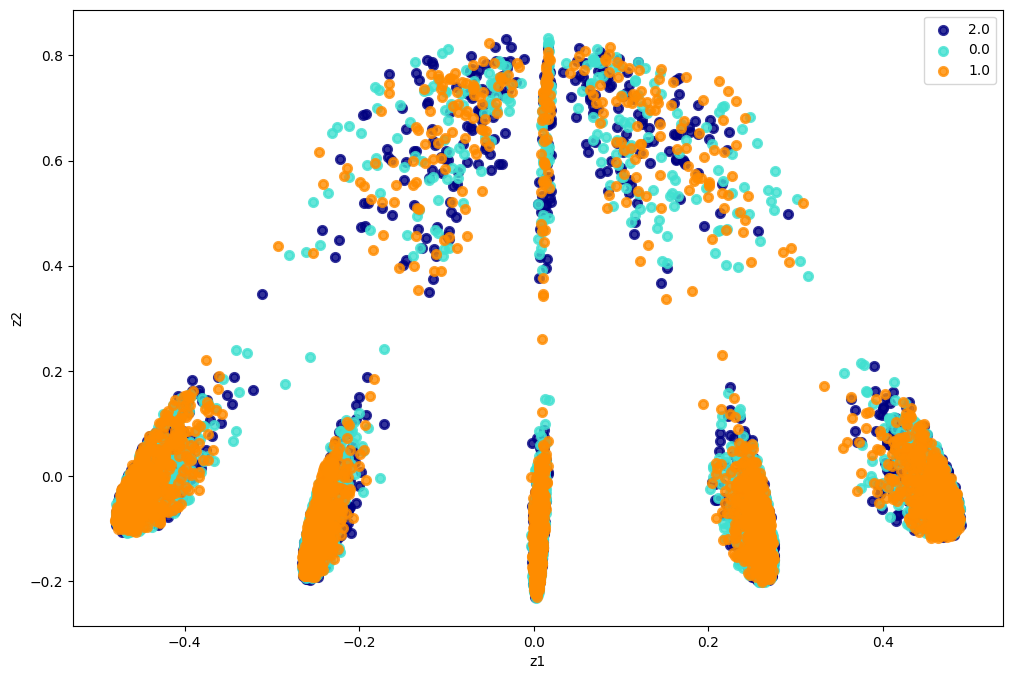

In [161]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

### tSNE

t-SNE - метод, который использует поэтапный итерационный подход для низкоразмерного представления исходных данных с сохранением информации об их локальном соседстве.

**вложение** — многомерные данные, представленные в пространстве меньшей размерности;
**сосед** — точка данных, расположенная близко к интересующей нас точке данных;
**стохастический** — случайно используемый в итерационном процессе при поиске репрезентативного вложения;
**t-распределение** — распределение вероятности, используемое алгоритмом для вычисления оценок сходства в низкоразмерном вложении.


In [163]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_new = tsne.fit_transform(X)

In [164]:
# Вывод результатов
print('Initial Shape of X: ', X.shape)
print('New Shape of X: ', X_new.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)
#print('Embedding vectors: ', tsne.embedding_)

Initial Shape of X:  (7672, 6)
New Shape of X:  (7672, 2)
Kullback-Leibler divergence after optimization:  1.4774991273880005
No. of iterations:  999


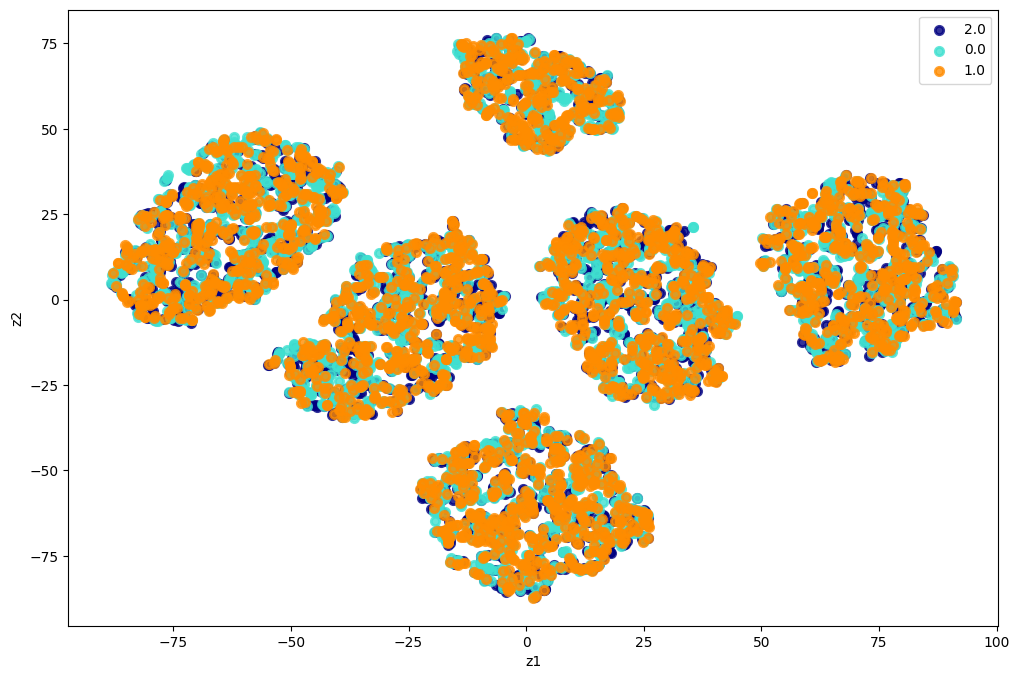

In [165]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

## DBSCAN для кластеризации
DBSCAN расшифровывается как Density-Based Spatial Clustering of Applications with Noise. Он принадлежит к семейству алгоритмов кластеризации с неконтролируемым обучением.

DBSCAN — это алгоритм кластеризации на основе плотности, который предполагает, что кластеры — это плотные области в пространстве, разделенные областями с более низкой плотностью точек данных. Здесь «плотно сгруппированные» точки данных объединяются в один кластер. Мы можем идентифицировать кластеры в больших наборах данных, наблюдая за локальной плотностью точек данных.

**Ключевые характеристики алгоритма DBSCAN**
1. Не требуется количество кластеров в качестве входных данных.
1. Он может обнаруживать выбросы при нахождении кластеров.
1. Алгоритм DBSCAN может обнаруживать кластеры сложной или случайной формы и размера.


In [166]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [167]:
dbscan_cluster1 = DBSCAN(eps = 0.08, min_samples = 1)
X_new = dbscan_cluster1.fit(X)

In [168]:
# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 7652
Estimated no. of noise points: 0
v_measure = 0.21831999467451768


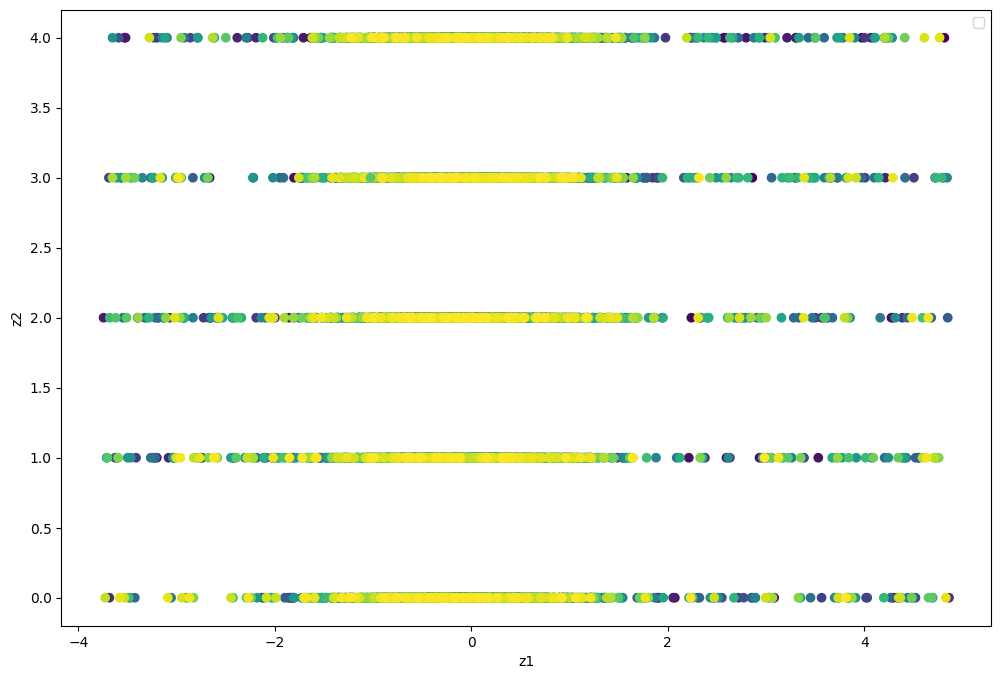

In [170]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

plt.scatter(
        X['temperature'], X['location'], c=dbscan_cluster1.labels_
    )

plt.legend(loc="best", shadow=False, scatterpoints=2)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

Чтобы правильно опрделить число eps, воспользуемся правилом локтя.

Для этого выведем график изменения средних расстояний от каждой точки до min_samples ближайших.

In [171]:
from sklearn.neighbors import NearestNeighbors

min_samples = 3

knn = NearestNeighbors(n_neighbors = min_samples, metric = 'l2')
knn.fit(X)

dists, inds = knn.kneighbors(X)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()

In [172]:
import sklearn
#возможные метрики расстояния
sklearn.metrics.pairwise.distance_metrics()

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

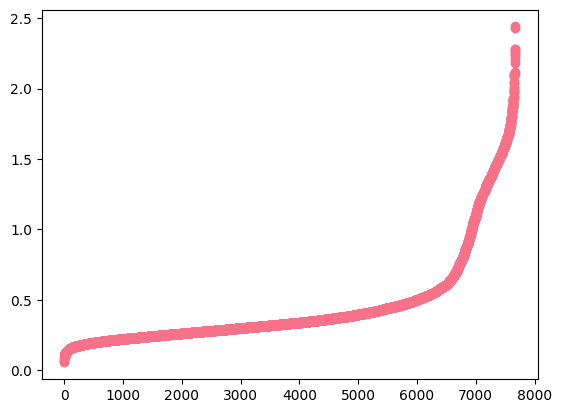

In [173]:
plt.scatter(x = range(len(dists_ar)), y=dists_ar)
plt.show()

## DBSCAN для определения выбросов

In [174]:
dbscan = DBSCAN(eps = 0.0008, min_samples = 1)
print(dbscan)

DBSCAN(eps=0.0008, min_samples=1)


In [175]:
pred = dbscan.fit_predict(X)

In [176]:
# Number of Clusters
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 7672
Estimated no. of noise points: 0
v_measure = 0.2187572735255659


In [177]:
# у анномалий - класс -1, ищем все номера строк с таким классом, потом отбираем эти строки из начального набора данных

anom_index = [i for i in range(len(pred)) if pred[i] == -1]
values = X.loc[anom_index]

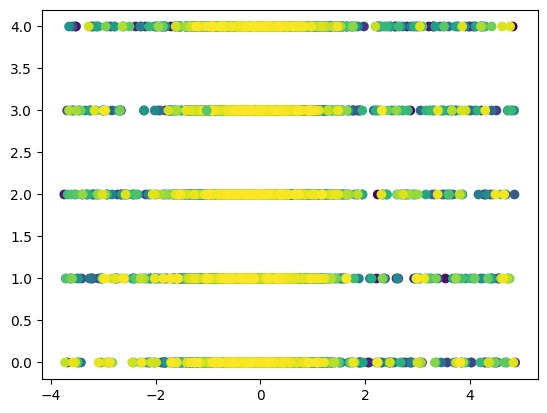

In [178]:
plt.scatter(X['temperature'], X['location'],c=dbscan_cluster1.labels_)
plt.scatter(values['temperature'], values['location'], color='r')
plt.show()